In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(321)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.clf()
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

def evaluate_binary_clf_proba(y_actual, y_prob):
    plt.clf()
    precisions, recalls, thresholds = precision_recall_curve(y_actual, y_prob)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    fpr, tpr, _ = roc_curve(y_actual, y_prob)
    plt.plot(fpr, tpr, marker='.')
    auc = roc_auc_score(y_actual, y_prob)
    print('auc: ', auc)
    plt.show()

def evaluate_binary_clf_bin(y_actual, y_bin):
    plt.clf()
    print(confusion_matrix(y_actual, y_bin))
    print('precision: ', precision_score(y_actual, y_bin))
    print('recall: ', recall_score(y_actual, y_bin))
    print('f1-score: ', f1_score(y_actual, y_bin))


# % matplotlib inline
# We will perform logistic regression using a simple toy dataset of two classes
X, y_true = make_blobs(n_samples= 1000, centers=2)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

# Reshape targets to get column vector with shape (n_samples, 1)
y_true = y_true[:, np.newaxis]
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_true)

print(f'Shape X_train: {X_train.shape}')
print(f'Shape y_train: {y_train.shape}')
print(f'Shape X_test: {X_test.shape}')
print(f'Shape y_test: {y_test.shape}')

<Figure size 800x600 with 1 Axes>

Shape X_train: (750, 2)
Shape y_train: (750, 1)
Shape X_test: (250, 2)
Shape y_test: (250, 1)


In [2]:
class LogisticRegression:
    
    def __init__(self):
        pass

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def getX1(self, X):
        n_samples, n_features = X.shape
        ones = np.ones(shape=(n_samples, 1))
        X1 = np.concatenate((X, ones),axis = 1)
        return X1
    
    def train_gradient_descent(self, X, y, learning_rate=0.01, n_iters=100):
        """
        Trains a linear regression model using gradient descent
        """
        # Step 0: Initialize the parameters
        n_samples, n_features = X.shape
        X1 = self.getX1(X)   
        self.weights = np.zeros(shape=(n_features + 1, 1))
        costs = []
        # Step 1: Loop until iterate enough
        # h(w) = 1 / (1 + pow(e, -wx))
        # C(w) = - (y * log(h) + (1 - y) * log(1 - h))
        # J(w) = 1 / m * Sum(C)
        # dJ/dw = 1 / m * Sum(h - y) * x
        for k in range(n_iters):
            # Step 1: Compute a linear combination of the input features and weights
            w_x = np.dot(X1, self.weights)
            h_x = self.sigmoid(w_x)
            
            # Step 2: Compute cost over training set
            # wrong impl: should simply MULTIPLY y by log(h) rather than np.dot
#             cost = (1 / n_samples) * np.sum(np.dot(y, np.log(h_x)) + np.dot((1 - y), np.log(1 - h_x)))
            cost = -(1 / n_samples) * np.sum(y * np.log(h_x) + (1 - y) * np.log(1 - h_x))
            
            costs.append(cost)
            if k % (n_iters / 10) == 0:
#             if k % 100 == 0:
                print(f"Cost at iteration {k}: {cost}")

            # Step 3: Compute the gradients
            dJ_dw = 1.0 / n_samples * np.dot(X1.T, h_x - y)
            
            # Step 4: Update the parameters
            self.weights -= learning_rate * dJ_dw
        return self.weights, costs

    def predict(self, X):
        X1 = self.getX1(X)
        w_x = np.dot(X1, self.weights)
        h_x = self.sigmoid(w_x)
        y_predict_labels = [1 if elem > 0.5 else 0 for elem in h_x]
        return y_predict_labels
    
    def predict_proba(self, X):
        X1 = self.getX1(X)
        w_x = np.dot(X1, self.weights)
        h_x = self.sigmoid(w_x)
        return h_x

Cost at iteration 0: 0.6931471805599453
Cost at iteration 100: 0.31664244353901155
Cost at iteration 200: 0.22808357652476471
Cost at iteration 300: 0.1890091372444746
Cost at iteration 400: 0.16669017911534093
Cost at iteration 500: 0.15210382727895708
Cost at iteration 600: 0.1417534519803076
Cost at iteration 700: 0.13399066422165556
Cost at iteration 800: 0.12793233129638362
Cost at iteration 900: 0.12306057248355981


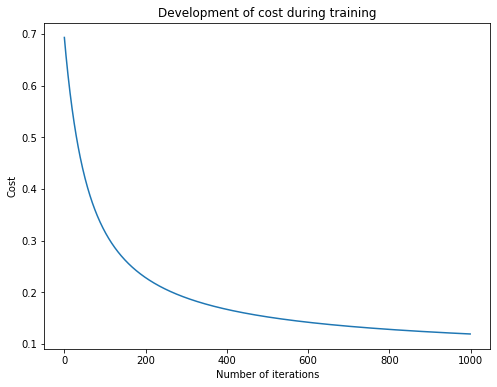

[[369  11]
 [ 11 359]]
precision:  0.9702702702702702
recall:  0.9702702702702702
f1-score:  0.9702702702702702
[[117   3]
 [ 10 120]]
precision:  0.975609756097561
recall:  0.9230769230769231
f1-score:  0.9486166007905139


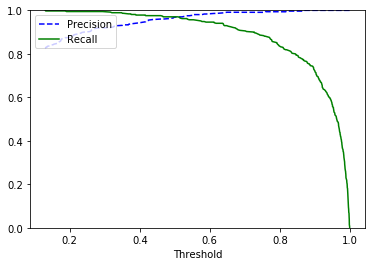

auc:  0.9959815078236132


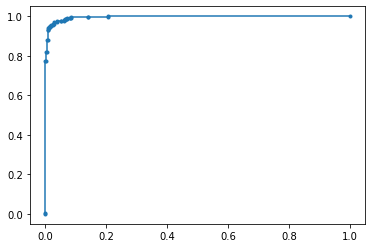

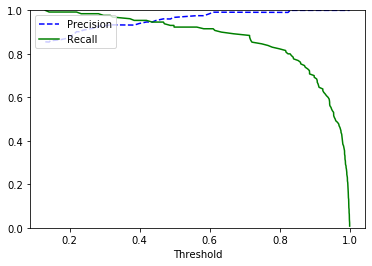

auc:  0.9928205128205128


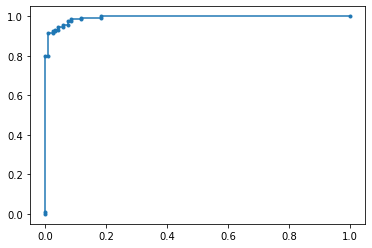

lr weights: [[1.07064164]
 [1.39060849]
 [0.04971728]]


In [3]:
n_iters = 1000
learning_rate = 0.01

lr = LogisticRegression()
w_trained, costs = lr.train_gradient_descent(X_train, y_train, learning_rate, n_iters)
    
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(n_iters), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = lr.predict(X_train)
y_p_test = lr.predict(X_test)

evaluate_binary_clf_bin(y_train, y_p_train)
evaluate_binary_clf_bin(y_test, y_p_test)

y_proba_train = lr.predict_proba(X_train)
y_proba_test = lr.predict_proba(X_test)

evaluate_binary_clf_proba(y_train, y_proba_train)
evaluate_binary_clf_proba(y_test, y_proba_test)

print('lr weights:', lr.weights)

In [5]:
y_train.shape

(750, 1)